In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## preprocessing
from sklearn.preprocessing import StandardScaler

## model selction
from sklearn.model_selection import train_test_split

#### loading algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

### metrics
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, r2_score

In [ ]:
# Academic success data load from the website
# https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


data=pd.read_csv("/content/data.csv")

In [ ]:
#Academic dataset column datatypes
data.columns


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
#Converting target variable from object to numeric form
data['Target'] = data['Target'].map({'Dropout': 0, 'Graduate': 1})
data.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1.0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0.0


In [ ]:
data.Target.isna().sum()

794

In [ ]:
data=data.dropna()

In [ ]:
#Feature variable dataframe
features = data.drop('Target',axis=1)

In [ ]:
#Target variable dataframe
target = data.Target

In [ ]:
#Normalizing the Feature variables
scaling= StandardScaler()
scaled_features=scaling.fit_transform(features)

In [ ]:
#Split the new dataset into training and test data
train_features,test_features,target_train,target_test = train_test_split(scaled_features, target,test_size=0.20, random_state=10)

In [ ]:
#Random Forest - ML Method 1
import warnings
with warnings.catch_warnings(record=True):
    randm_for_class = RandomForestClassifier(random_state=20)
    randm_for_class.fit(train_features, target_train)
    result_predicted = randm_for_class.predict(test_features)
    A=randm_for_class.score(test_features,target_test)
    print('Classification Report for Random Forest - ML Method 1->\n',classification_report(target_test, result_predicted))
    print('Mean Absolute Error for Random Forest - ML Method 1->', mean_absolute_error(target_test, result_predicted))
    print("")
    print('Root Mean Square Error for Random Forest - ML Method 1->', np.sqrt(mean_squared_error(target_test, result_predicted)))
    print("")
    print('R-squared Score for Random Forest - ML Method 1->',r2_score(target_test, result_predicted))
    print("")
    print("model_score_A >>>>>>>> ",A)

Classification Report for Random Forest - ML Method 1->
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       245
         1.0       0.92      0.97      0.95       481

    accuracy                           0.93       726
   macro avg       0.93      0.91      0.92       726
weighted avg       0.93      0.93      0.93       726

Mean Absolute Error for Random Forest - ML Method 1-> 0.07162534435261708

Root Mean Square Error for Random Forest - ML Method 1-> 0.2676291171614499

R-squared Score for Random Forest - ML Method 1-> 0.6796469939327083

model_score_A >>>>>>>>  0.928374655647383


In [ ]:
###   XG Boost Classifier - ML Method 2
###   Extreme Gradient Boosting "utilizes gradient boosting techniques "
import warnings
with warnings.catch_warnings(record=True):
    xg_boost_class = XGBClassifier()
    xg_boost_class.fit(train_features, target_train)
    y_pred_XG = xg_boost_class.predict(test_features)
    B=xg_boost_class.score(test_features,target_test)
    print('Classification Report for XG Boost - ML Method 2->\n',classification_report(target_test, y_pred_XG))
    print("")
    print('Mean Absolute Error for XG Boost - ML Method 2->', mean_absolute_error(target_test, y_pred_XG))
    print("")
    print('Root Mean Square Error for XG Boost - ML Method 2->', np.sqrt(mean_squared_error(target_test, y_pred_XG)))
    print("")
    print('R-squared Score for XG Boost - ML Method 2->',r2_score(target_test, y_pred_XG))
    print("")
    print("model_score_B >>>>>>>>",B)

Classification Report for XG Boost - ML Method 2->
               precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       245
         1.0       0.92      0.97      0.95       481

    accuracy                           0.93       726
   macro avg       0.93      0.91      0.92       726
weighted avg       0.93      0.93      0.93       726


Mean Absolute Error for XG Boost - ML Method 2-> 0.07162534435261708

Root Mean Square Error for XG Boost - ML Method 2-> 0.2676291171614499

R-squared Score for XG Boost - ML Method 2-> 0.6796469939327083

model_score_B >>>>>>>> 0.928374655647383


In [ ]:
#K Nearest Neighbour - ML Method 3
import warnings
with warnings.catch_warnings(record=True):
    knn_class =  KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 4)
    knn_class.fit(train_features, target_train)
    y_pred_KNN = knn_class.predict(test_features)
    C=knn_class.score(test_features,target_test)
    print('Classification Report for K Nearest Neighbour - ML Method 3->\n',classification_report(target_test, y_pred_KNN))
    print("")
    print('Mean Absolute Error for K Nearest Neighbour - ML Method 3->', mean_absolute_error(target_test, y_pred_KNN))
    print("")
    print('Root Mean Square Error for K Nearest Neighbour - ML Method 3->', np.sqrt(mean_squared_error(target_test, y_pred_KNN)))
    print("")
    print('R-squared Score for K Nearest Neighbour - ML Method 3->',r2_score(target_test, y_pred_KNN))
    print("")
    print("model_score_C>>>>>>>> ",C)

Classification Report for K Nearest Neighbour - ML Method 3->
               precision    recall  f1-score   support

         0.0       0.92      0.73      0.81       245
         1.0       0.88      0.97      0.92       481

    accuracy                           0.89       726
   macro avg       0.90      0.85      0.87       726
weighted avg       0.89      0.89      0.88       726


Mean Absolute Error for K Nearest Neighbour - ML Method 3-> 0.11294765840220386

Root Mean Square Error for K Nearest Neighbour - ML Method 3-> 0.3360768638305884

R-squared Score for K Nearest Neighbour - ML Method 3-> 0.4948279519708092

model_score_C>>>>>>>>  0.8870523415977961


In [ ]:
#Principal Component Analysis (PCA) Clustering - ML Method 4
pca = PCA(2)

pca.fit(features)
acad_pca = pca.transform(features)
pca.explained_variance_ratio_

array([9.99404687e-01, 2.31778970e-04])

Text(0.5, 0, 'Principal Component 1')

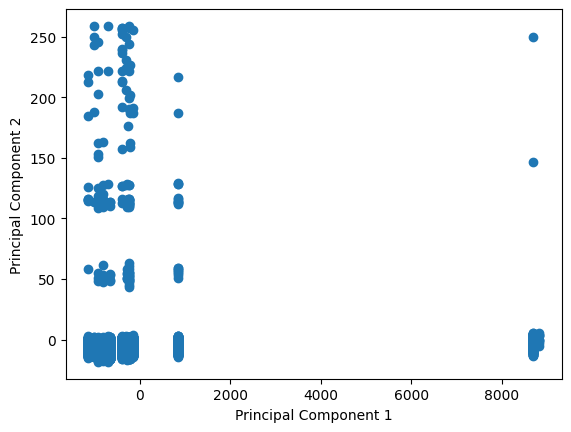

In [ ]:
#Scatter plot for Principal Component 1 and Principal Component 2
axe = plt.gca()
axe.scatter(acad_pca[:,0], acad_pca[:,1])
axe.set_ylabel('Principal Component 2')
axe.set_xlabel('Principal Component 1')

In [ ]:

##### Compute the correlation matrix
correlation_matrix = data.corr()

#### correlation values with the target variable
correlation_with_target = abs(correlation_matrix['Target'])

#### Sort the features based on their correlation with the target variable
sorted_features = correlation_with_target.sort_values(ascending=False)

#### Select the top ten features
new_features=list(sorted_features.index)
y=target
newfeatures=new_features[1:]
newdata=data[newfeatures]
scale=StandardScaler()
X=scale.fit_transform(newdata)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=2)


In [ ]:
model=RandomForestClassifier(n_estimators=80)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80)

In [ ]:

a=model.score(X_test,y_test)
print("new_model_score_a >>>>>>>>",a)

new_model_score_a >>>>>>>> 0.9242424242424242


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
c=knn.score(X_test,y_test)
print("new_model_score_c >>>>>>>>",c)

new_model_score_c >>>>>>>> 0.7617079889807162


In [ ]:
xg_boost_class = XGBClassifier()
xg_boost_class.fit(X_train, y_train)
y_pred_XG = xg_boost_class.predict(X_test)
b=model.score(X_test,y_test)
b

0.9242424242424242

In [ ]:
classifiers=["Random_forest","XG_boost","KNN"]


data=pd.DataFrame(index=classifiers,data={"with_15":np.array([a,b,c]),"with_all":np.array([A,B,C])})
data


,with_15,with_all
Random_forest,0.924242,0.928375
XG_boost,0.924242,0.928375
KNN,0.761708,0.887052


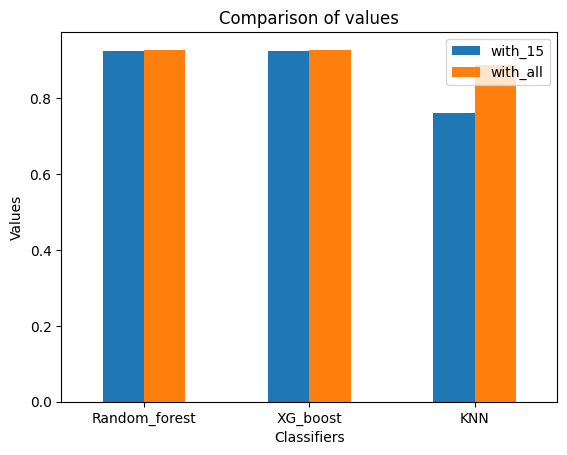

In [ ]:
data.plot.bar(rot=0)
plt.xlabel('Classifiers')
plt.ylabel('Values')
plt.title('Comparison of values')
plt.legend(['with_15', 'with_all'])
plt.show()